# Beta Neutral Portfolio Strategy

**Financial beta**, also known as asset beta or levered beta, is a measure of the volatility of a stock or a portfolio of stocks compared to the overall market. It is a crucial component of the capital asset pricing model (CAPM) and is generally used to compare two different asset, most of the time a stock to its respective ETF (*Exchange Traded Fund*).

Mathematically, beta is defined as the covariance of the asset's returns with the market returns divided by the variance of the market returns. In other words, beta measures how much an asset's returns move in relation to the market's returns or comparison point.

Beta is typically calculated using historical data, and a beta of 1 indicates that the asset's returns move in line with the market. A beta greater than 1 indicates that the asset is more volatile than the market, while a beta less than 1 indicates that the asset is less volatile than the market. These effects are important to understand, as a higher beta implies a higher expected return but also higher risk, while a lower beta implies a lower expected return but lower risk.

Here's a more graphical exemple of this factor between QQQ, an ETF composed of S&P500 stocks, and different assets:



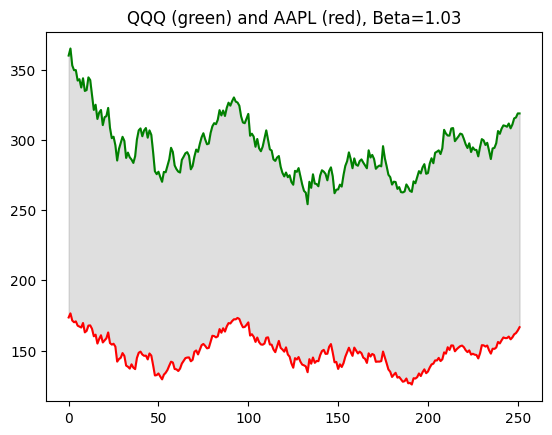  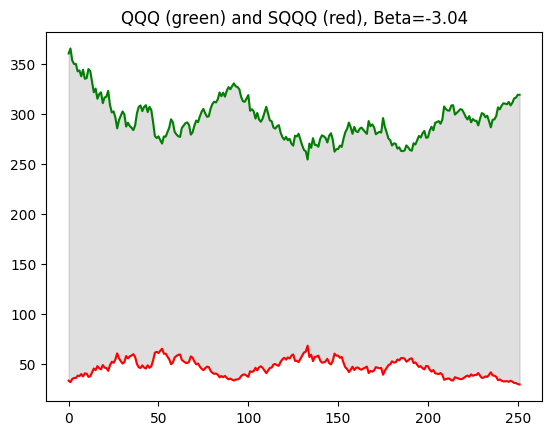


Here, we can observe that AAPL, with a beta of 1.03, follows QQQ's returns, where as SQQQ, an ETF made to have higher returns when QQQ goes down, has a beta of -3.04, which is highly uncorrelated.


A portfolio that is beta neutral is built upon the idea that it should be unexposed to the mouvements of the market, meaning a beta of zero. To do so, the weighted average of all holdings should total to a neutral beta.


***

From this information, one may be intrigued as to why a Beta-Neutral portfolio strategy is so attractive to investors and managers.

1. <u>Reduced market risk</u>: By constructing a portfolio that is beta-neutral, an investor can reduce their exposure to market risk. This means that the portfolio's returns are less affected by fluctuations in the broader market, making it more stable in the face of market volatility.

2. <u>Increased diversification</u>: A beta-neutral portfolio typically involves investing in a mix of assets with different levels of beta. This can lead to increased diversification, which can help reduce the overall risk of the portfolio.

3. <u>Improved risk-adjusted returns</u>: By balancing the portfolio's beta, investors can potentially achieve better risk-adjusted returns. This means that the returns achieved by the portfolio are higher relative to the amount of risk taken on.

4. <u>Potential for alpha generation</u>: By actively managing the portfolio's beta exposure, investors may be able to generate alpha, or excess returns above a benchmark. This can be achieved through skilled security selection and/or market timing, which can lead to outperformance relative to the broader market.

For this tutorial, we will use ETFs made up of Bonds, Futures and commodities as it is a simpler way to emulate returns, but is also safer than using stocks to generate Alpha.

**What we will do**
1. Import necessary packages
2. Select the necessary stocks depending on the selected exchange
3. Import the stock data using yahoofinance python api
4. Calculate the necessary statistics and return beta of each stocks


To build our model, we first need to import the right packages

In [ ]:
#Necessary imports for building our model
import statsmodels.api as sm
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import yfinance as yf
from datetime import datetime
import datetime as dt

For this example, we will use a diversified list of ETFs that are composed, once again, of bonds, futures and commodities: 
* Bond ETF that closely tracks a benchmark bond index, such as the iShares Core U.S. Aggregate Bond ETF (AGG)
* Futures ETF that tracks a diversified basket of futures contracts, such as the ProShares Hedge Replication ETF (HDG)
* Commodities ETF that tracks a diversified basket of commodities, such as the iShares S&P GSCI Commodity-Indexed Trust (GSG) or the Invesco DB Commodity Index Tracking Fund (DBC)


In [ ]:
#Import the tickers and return a dataset of the price of the ETFs
tickers=[]

# Download historical prices for the tickers
prices = yf.download(tickers, start='2020-01-01', end='2022-04-12')['Adj Close']


In [ ]:



# Calculate the daily returns for each ticker
returns = prices.pct_change().dropna()

# Calculate each ticker's beta relative to the S&P 500
benchmark_prices = yf.download('^GSPC', start='2020-01-01', end='2022-04-12')['Adj Close']
benchmark_returns = benchmark_prices.pct_change().dropna()
betas = {}
for ticker in tickers:
    beta = returns[ticker].cov(benchmark_returns) / benchmark_returns.var()
    betas[ticker] = beta

# Calculate the portfolio weights based on each ticker's beta
total_beta = sum(betas.values())
weights = {ticker: beta / total_beta for ticker, beta in betas.items()}

# Calculate the beta-neutral portfolio returns
portfolio_returns = (returns * pd.Series(weights)).sum(axis=1)

# Calculate the portfolio's beta relative to the S&P 500
portfolio_beta = portfolio_returns.cov(benchmark_returns) / benchmark_returns.var()

print('Portfolio weights:', weights)
print('Portfolio beta:', portfolio_beta)